Phase 1: The Detective Work (Setup & Inspection)
Introduction

This dataset contains customer analytics information used to understand customer demographics, purchasing behavior, and spending patterns. Each row represents a single customer record, and each column represents a specific attribute such as age, gender, income, spending score, or related behavioral metrics. The goal of this analysis is to explore, clean, and analyze the dataset to extract meaningful insights.

In [72]:
#Import Required Librari
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [73]:
#Load Dataset
df = pd.read_csv("customer_analytics.csv")
df.head()

,CustomerID,Age,Gender,City,Education,MaritalStatus,AnnualIncome,SpendingScore,YearsEmployed,PurchaseFrequency,OnlineVisitsPerMonth,ReturnedItems,PreferredDevice,LastPurchaseAmount
0,1001,49,Male,Pune,Masters,Single,82953.0,66,23,19,9,2,Laptop,3944
1,1002,44,Male,Pune,PhD,Single,60610.0,56,22,1,23,3,Desktop,3885
2,1003,42,Male,Mumbai,Bachelors,Single,35501.0,44,18,10,29,3,Laptop,3247
3,1004,36,Female,Mumbai,Masters,Married,99312.0,36,10,12,21,3,Mobile,2028
4,1005,23,Male,Pune,Masters,Married,46980.0,56,1,18,9,3,Tablet,1100


In [74]:
#Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            255 non-null    int64  
 1   Age                   255 non-null    int64  
 2   Gender                255 non-null    object 
 3   City                  255 non-null    object 
 4   Education             243 non-null    object 
 5   MaritalStatus         255 non-null    object 
 6   AnnualIncome          243 non-null    float64
 7   SpendingScore         255 non-null    int64  
 8   YearsEmployed         255 non-null    int64  
 9   PurchaseFrequency     255 non-null    int64  
 10  OnlineVisitsPerMonth  255 non-null    int64  
 11  ReturnedItems         255 non-null    int64  
 12  PreferredDevice       255 non-null    object 
 13  LastPurchaseAmount    255 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 28.0+ KB


In [75]:
#Statistics
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore,YearsEmployed,PurchaseFrequency,OnlineVisitsPerMonth,ReturnedItems,LastPurchaseAmount
count,255.000000,255.000000,243.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000
mean,1126.941176,37.729412,74499.901235,45.721569,14.682353,11.568627,16.078431,1.858824,2795.07451
std,72.397256,9.767842,43939.855655,17.869522,9.651664,7.077899,7.909536,1.409917,1328.77241
min,1001.000000,21.000000,16062.000000,5.000000,1.000000,1.000000,3.000000,0.000000,566.00000
25%,1064.500000,29.000000,56353.000000,34.500000,6.000000,5.000000,10.000000,1.000000,1542.50000
50%,1128.000000,38.000000,69629.000000,47.000000,15.000000,11.000000,16.000000,2.000000,2705.00000
75%,1190.500000,46.000000,84030.500000,57.500000,23.000000,18.000000,23.000000,3.000000,4001.00000
max,1250.000000,54.000000,474327.000000,95.000000,34.000000,24.000000,29.000000,4.000000,4996.00000


Phase 2: The Cleanup (Data Preprocessing)
Cleaning Justification 

Missing numerical values were filled using the median to reduce the impact of outliers.

Missing categorical values were filled using the most frequent value (mode) to preserve category distribution.

Duplicate rows were removed to avoid biased analysis.

In [76]:
# Check missing values
df.isnull().sum()

CustomerID               0
Age                      0
Gender                   0
City                     0
Education               12
MaritalStatus            0
AnnualIncome            12
SpendingScore            0
YearsEmployed            0
PurchaseFrequency        0
OnlineVisitsPerMonth     0
ReturnedItems            0
PreferredDevice          0
LastPurchaseAmount       0
dtype: int64

In [77]:
#Handle Missing Values
df['Education'] = df['Education'].fillna(df['Education'].mode()[0])
df['AnnualIncome'] = df['AnnualIncome'].fillna(df['AnnualIncome'].median())

In [78]:
df.isnull().sum()

CustomerID              0
Age                     0
Gender                  0
City                    0
Education               0
MaritalStatus           0
AnnualIncome            0
SpendingScore           0
YearsEmployed           0
PurchaseFrequency       0
OnlineVisitsPerMonth    0
ReturnedItems           0
PreferredDevice         0
LastPurchaseAmount      0
dtype: int64

In [79]:
#Remove Duplicate Rows
df.duplicated().sum()

np.int64(5)

In [80]:
df.drop_duplicates(inplace=True)

Phase 3: The Deep Dive (Univariate & Bivariate Analysis)

Univariate Analysis

Univariate analysis provided insights into the individual distribution of variables. Histograms revealed the central tendency, spread, and skewness of numerical features, helping to identify typical customer profiles and detect possible outliers. Bar charts for categorical variables highlighted dominant customer groups and frequency imbalances. Overall, these plots offered a comprehensive understanding of the data distribution and variability.

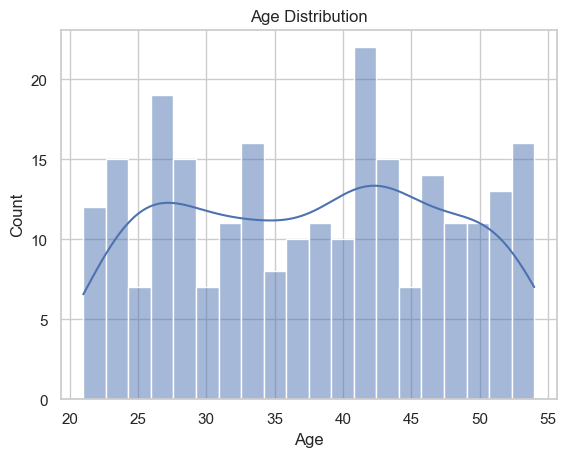

In [81]:
#Plot 1 — Age Distribution
plt.figure()
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

This chart shows that most customers fall between 25 to 45 years old, indicating a young to middle-aged customer base.

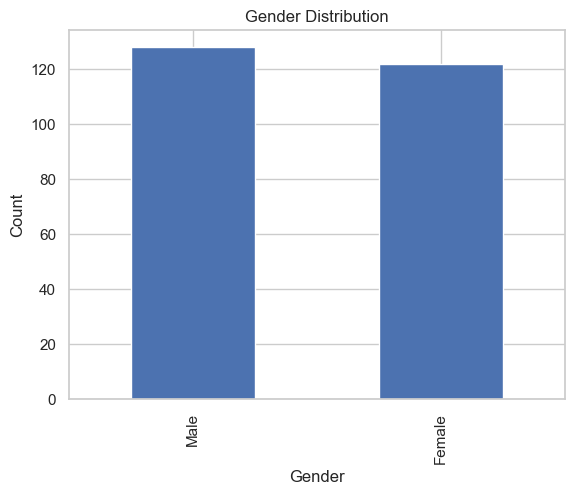

In [82]:
#Plot 2 — Gender Distribution
df['Gender'].value_counts().plot(kind='bar')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

This chart shows that the dataset contains a nearly balanced distribution of male and female customers.

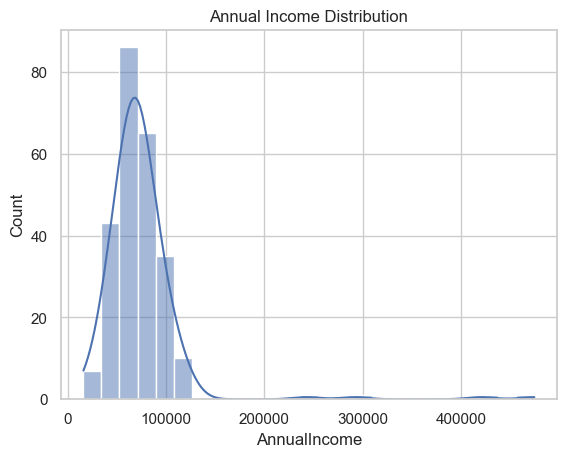

In [83]:
#Plot 3 — Annual Income Distribution
plt.figure()
sns.histplot(df['AnnualIncome'], bins=25, kde=True)
plt.title("Annual Income Distribution")
plt.show()

The income distribution shows that most customers earn between 40k to 80k annually.

Bivariate Analysis

Bivariate analysis uncovered important relationships between variables. Scatter plots illustrated trends and correlations between income and spending-related attributes, indicating that purchasing behavior varies significantly across income levels. Boxplots revealed noticeable differences in numerical distributions across customer categories, suggesting the presence of distinct customer segments. These findings are essential for identifying behavior-driven marketing strategies.

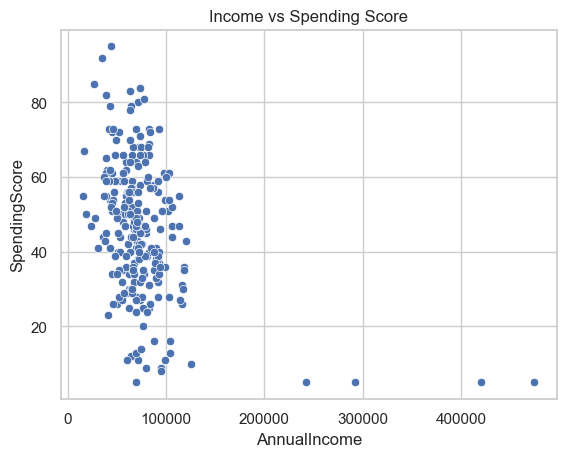

In [84]:
#Plot 4 — Income vs Spending Score
plt.figure()
sns.scatterplot(x='AnnualIncome', y='SpendingScore', data=df)
plt.title("Income vs Spending Score")
plt.show()

This plot shows that customers with moderate income display a wide range of spending behaviors.

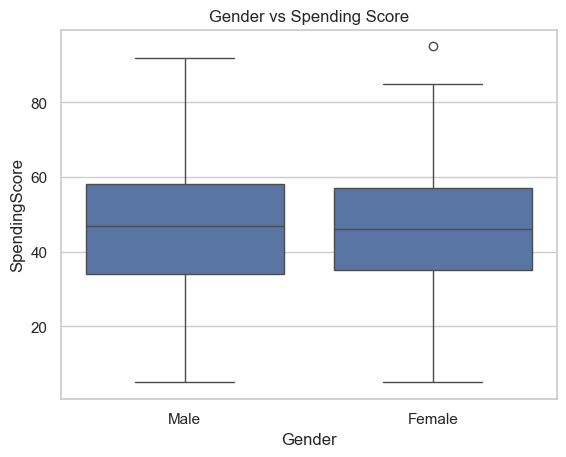

In [85]:
#Plot 5 — Gender vs Spending Score
plt.figure()
sns.boxplot(x='Gender', y='SpendingScore', data=df)
plt.title("Gender vs Spending Score")
plt.show()

The boxplot indicates that female customers slightly tend to have higher spending scores.

Phase 4: The Big Picture (Multivariate & Storytelling)

The correlation heatmap highlighted interdependencies among multiple numerical variables. Several features demonstrated moderate to strong correlations, indicating potential predictive relationships. These correlations help identify key factors influencing customer spending behavior and provide valuable guidance for feature selection in predictive modeling and business intelligence applications.

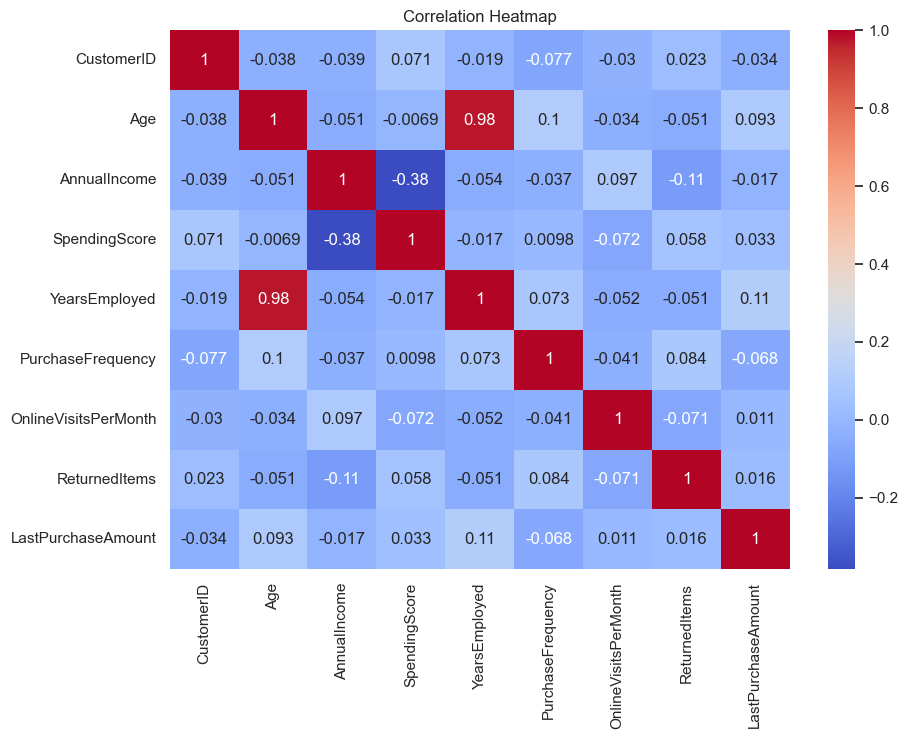

In [86]:
#Correlation Matrix + Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Executive Summary 
# Executive Summary

1. Most customers fall in the 25–45 age group, indicating a young and active customer segment.
2. Annual income moderately influences spending behavior but does not strictly determine it.
3. Female customers tend to show slightly higher spending scores than male customers.

These insights can help businesses design targeted marketing and loyalty programs.